In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [13]:
def first_number(error):
    error = str(error)
    if "e" in error:
        return error[0]
    else:
        error = error.strip("0.")
        return error[0]

In [108]:
def SE(x,a,lambda_):
    suma = 0
    for i in range(len(x)):
        if i == len(x)-1:
            suma += 0.5*((x[0]-x[i])/a)**2 + 0.5*x[i]**2 + lambda_*x[i]**4
        else:
            suma += 0.5*((x[i+1]-x[i])/a)**2 + 0.5*x[i]**2 + lambda_*x[i]**4

    return a*suma

In [145]:
x = [0.1,0.2,0.3,0.4,0.5,0.7,0.7,0.8,0.9,1.0]

print(SE(x,1,0))
print(SE(x,1,0.5))
print(SE(x,1,1.0))

2.45
3.7719000000000005
5.0938


### Acceptance rates

In [101]:
def acc_rates(a_list,lamb,start=1,size=10):
    plt.figure(figsize=(15,5))
    for a in a_list:
        df = pd.read_csv(f"./Datos/Oscillator/acc_rates/acc_l_{lamb}_a_{a}.csv")

        epsilons = df["epsilon"]
        acc_rates = df["mean"]
        stderrs = df["se"]

        plt.errorbar(epsilons,acc_rates,stderrs,marker="o",ls="-",ecolor="k",label=f"a={a}")

    plt.axhline(0.75,color = "brown",alpha=0.4,ls="--",xmin=0,xmax=0.5,label="Target acc rate = 0.75") #Objetivo de 0.75 de acc_rate
    plt.xlabel("Epsion")
    plt.ylabel("Acc rates")
    plt.title(f"Acceptance rates\n lambda={lamb}\n  size={size}, start={start}, samples = 1000")
    plt.xticks(np.arange(0,2.2,0.1))
    plt.xlim(0)
    plt.grid()
    plt.legend()
    plt.show()

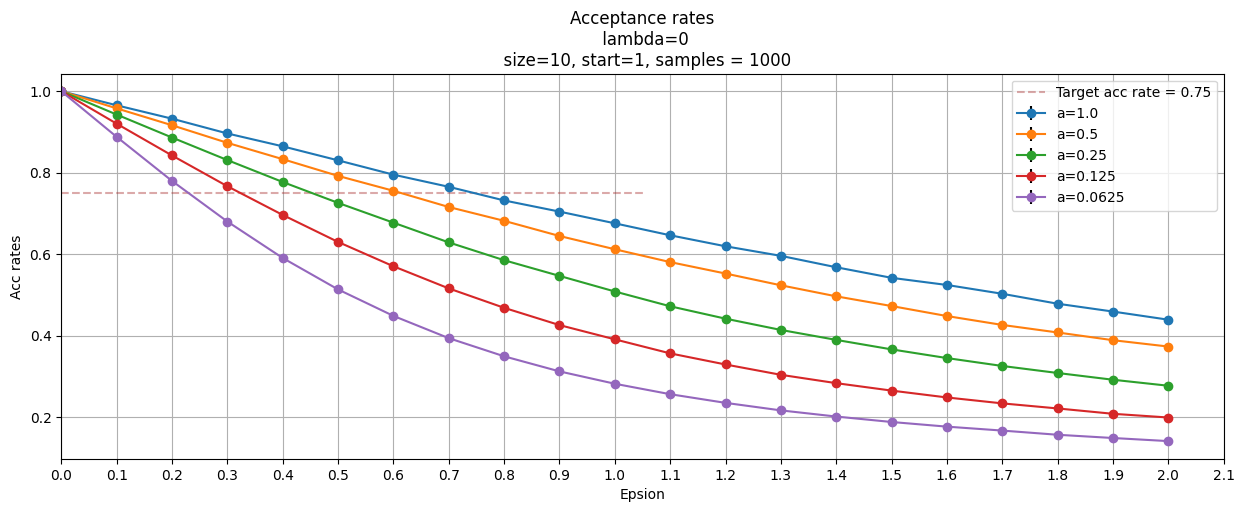

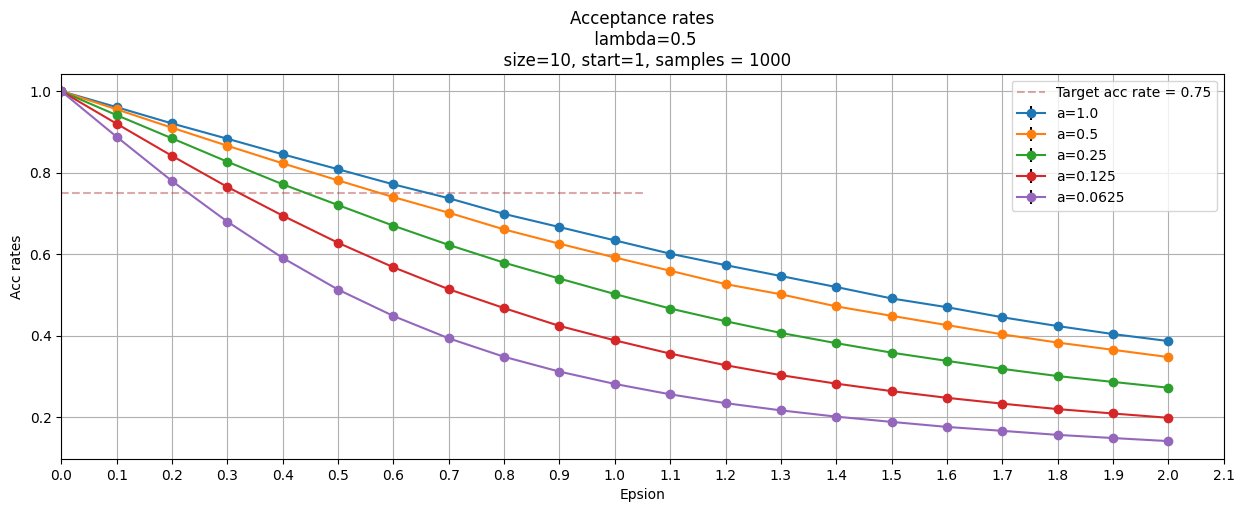

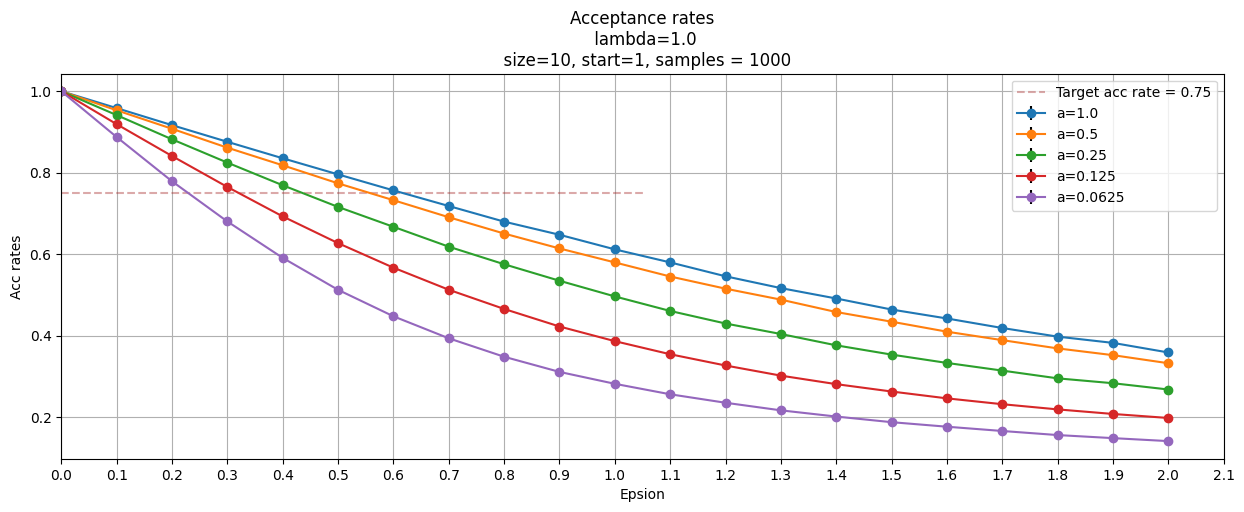

In [103]:
a_list = ["1.0","0.5","0.25","0.125","0.0625"]
acc_rates(a_list,lamb="0")
acc_rates(a_list,lamb="0.5")
acc_rates(a_list,lamb="1.0")

In [32]:
eps_dic={
    "lamb_0.0":{
        "1.0":0.75,
        "0.5":0.6,
        "0.25":0.45,
        "0.125":0.33,
        "0.0625":0.23
    },
    "lamb_0.5":{
        "1.0":0.65,
        "0.5":0.58,
        "0.25":0.44,
        "0.125":0.31,
        "0.0625":0.23
    },
    "lamb_1.0":{
        "1.0":0.6,
        "0.5":0.56,
        "0.25":0.43,
        "0.125":0.31,
        "0.0625":0.23
    }
}

def epsilon_opt(lamb,a):
    return eps_dic[f"lamb_{str(lamb)}"][f"{str(a)}"]

In [33]:
def epsilon_opt(lamb,a):
    return eps_dic[f"lamb_{str(lamb)}"][f"{str(a)}"]

epsilon_opt(lamb=0.0,a=1.0)


0.6

### Action vs sweeps


In [117]:
def hot_cold(lamb):
    df = pd.read_csv(f"./Datos/Oscillator/SE/lambda_{lamb}.csv",on_bad_lines="skip")
    
    y0 = df["SE_cold"]
    y1 = df["SE_hot"]

    plt.figure(figsize=(20,5))
    #plt.plot(y0,marker="o",alpha=0.5,color="blue",label=f"Cold start: mean = {y0.mean():0.4f}$\pm${np.sqrt(y0.var()/len(y0)):0.3f}")
    plt.plot(y1,marker="s",alpha=0.5,color="red",label=f"Hot start: mean = {y1.mean():0.4f}$\pm${np.sqrt(y1.var()/len(y1)):0.3f}")

    #plt.axhline(y0.mean(),color = "k", label = "cold mean")
    plt.axhline(y1.mean(),color = "grey", label = "hot mean")

    plt.title("S_E vs sweeps\nsweeps: 510000\ntermalization: 1000, steps: 10\na=1, measurements = 10000, λ=%s"%(lamb))

    plt.xlabel("sweeps")
    plt.xlim(50000,50100)
    plt.ylabel("$S_E$")
    plt.legend()
    plt.show()
    

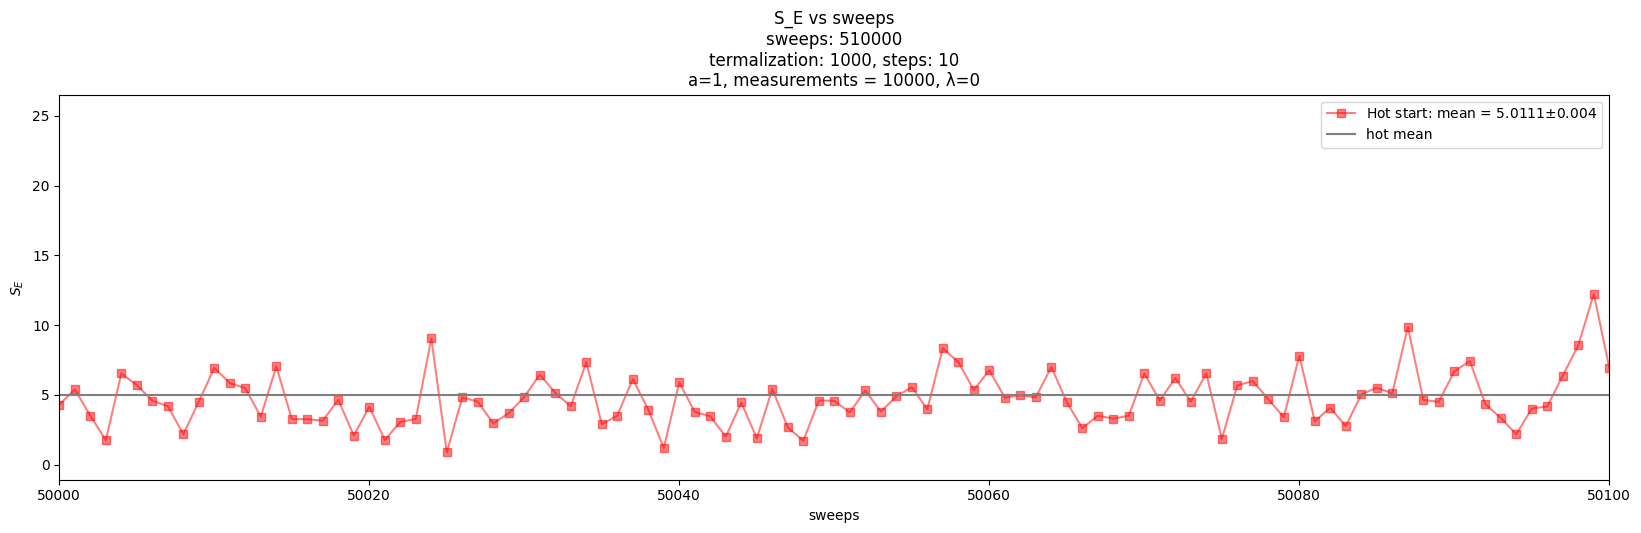

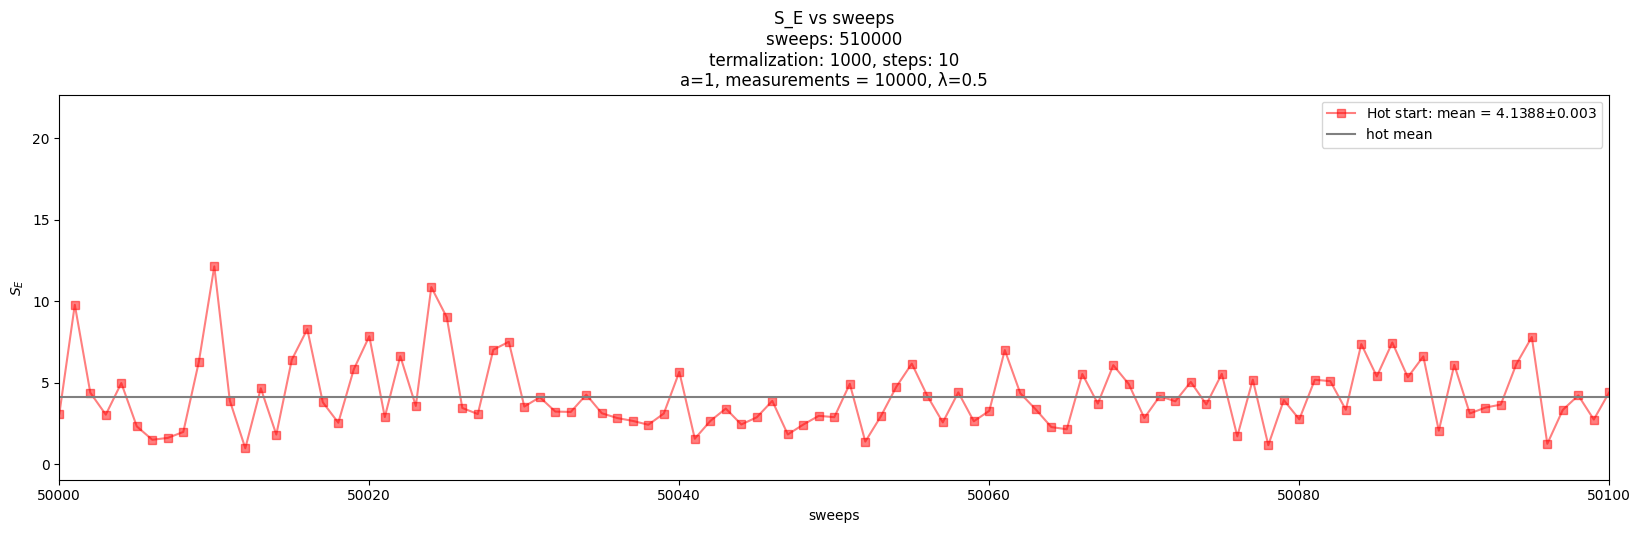

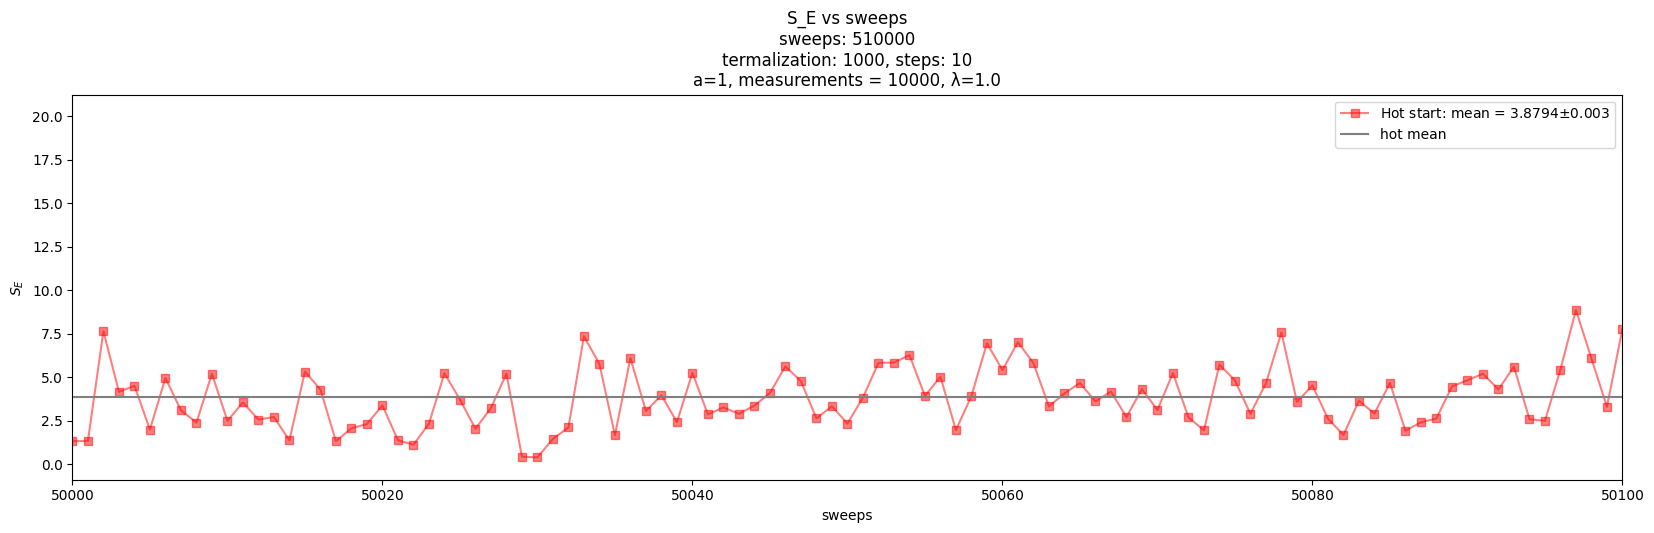

In [118]:
hot_cold(lamb="0")
hot_cold(lamb="0.5")
hot_cold(lamb="1.0")

In [142]:
def energy_plot(x,y,yerr,lambda_):
    def theoretical_energy(x,a,b):
        return a*x+b

    x_theo = np.linspace(0,1,1000)

    popt,pcov = curve_fit(theoretical_energy,x,y,sigma=yerr)

    residuals = (y - theoretical_energy(x, *popt))/yerr
    chi_squared = np.sum(residuals**2)

    # Calcula el número de grados de libertad
    num_params = len(popt)
    num_data_points = len(y)
    degrees_of_freedom = num_data_points - num_params

    # Calcula el chi-cuadrado reducido
    reduced_chi_squared = chi_squared / degrees_of_freedom

    
    a_err, b_err = np.sqrt(np.diag(pcov))
    a_err, b_err = first_number(a_err), first_number(b_err)

    plt.errorbar(x,y,yerr=yerr,marker="o",ls="",ecolor="k",label = "simulation")
    plt.plot(x_theo,theoretical_energy(x_theo,*popt),color="red",label = "theoretical")
    plt.plot([],[],label=f"{popt[0]:0.4f}({a_err}) $x^2$ + {popt[1]:0.4f}({b_err})\n $\chi ^2$/dof = {reduced_chi_squared:0.4f}")

    plt.title("$\Delta t$ vs $(E_0 = x^2)$\n $\lambda$ = "+f"{lambda_}")
    plt.ylabel("$E_0$")
    plt.xlabel("$\Delta t$")
    plt.legend()
    plt.show()

    print(f"a = {popt[0]} , b = {popt[1]}")
    print(f"err_a = {a_err}, err_b= {b_err}")
    print(f"Reduced chi-squared = {reduced_chi_squared}")

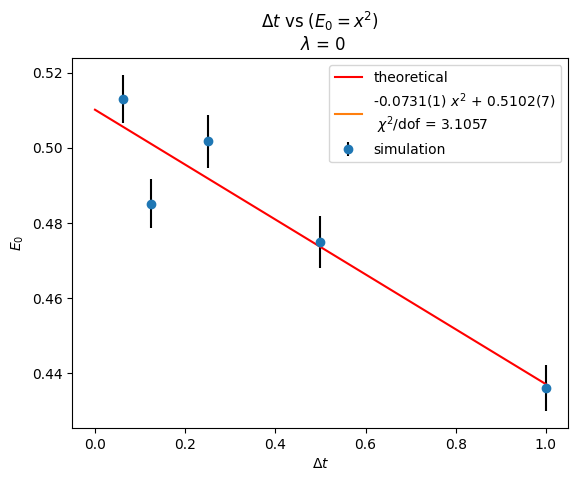

a = -0.07306804069192606 , b = 0.5101507620723968
err_a = 1, err_b= 7
Reduced chi-squared = 3.105650059126713


In [143]:
x = np.array([1.0,0.5,0.25,0.125,0.0625])
y = [0.436058,0.474925,0.501784,0.485168,0.512978]
yerr = [0.006103,0.006838, 0.007073,0.006485,0.006436]
lambda_ = 0
energy_plot(x,y,yerr,lambda_)


In [ ]:
def corr_plot(x,y,yerr,lambda_):
    def theoretical_corr(x,a,xi):
        return a*np.cosh((x-5)/xi)

    x_theo = np.lisnpace(0,1,1000)

    popt,pcov = curve_fit(theoretical_corr,x,y,sigma=yerr)

    residuals = (y - theoretical_corr(x, *popt))/yerr
    chi_squared = np.sum(residuals**2)

    # Calcula el número de grados de libertad
    num_params = len(popt)
    num_data_points = len(y)
    degrees_of_freedom = num_data_points - num_params

    # Calcula el chi-cuadrado reducido
    reduced_chi_squared = chi_squared / degrees_of_freedom

    
    a_err, xi_err = np.sqrt(np.diag(pcov))
    a_err, xi_err = first_number(a_err), first_number(xi_err)

    plt.errorbar(x,y,yerr=yerr,marker="o",ls="",ecolor="k",label = "simulation")
    plt.plot(x_theo,theoretical_corr(x_theo,*popt),color="red",label = "theoretical")
    plt.plot([],[],label=f"a = {popt[0]}({a_err}), $\xi$ = {popt[1]}({xi_err})\n $\chi ^2$/dof = {reduced_chi_squared:0.4f}")

    plt.title("$\Delta t$ vs $E_0$\n $\lambda$ = {lambda_}".format(lambda_))
    plt.yabel("$E_0$")
    plt.xlabel("$\Delta t$")
    plt.legend()
    plt.show()